In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam

/Users/matthewdrury/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)
Using TensorFlow backend.


In [2]:
cookies = pd.read_excel('cookieclassifier_data_matrix.xlsx')

In [3]:
cookies = cookies.sample(frac=1)
cookies.head()

,Italian seasoning,Worcestershire sauce,allspice,almonds,anchovies,anise,apples,apricots,arugula,bacon,...,tortillas,vanilla,vinegar,wafer cookies,walnuts,water,whipping cream,wine,yeast,zucchini
Cookies,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Pastries,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Pizzas,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pastries,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cookies,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [4]:
cookies.shape

(1931, 133)

In [5]:
X = cookies.values
y = cookies.index

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)

LabelEncoder()

In [20]:
y_numeric = le.transform(y)
y_labels = le.transform(le.classes_)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.3)

In [52]:
m = Sequential()
m.add(Dense(60,  activation='elu', input_shape=(133,)))
m.add(Dense(40,  activation='elu'))
m.add(Dense(20,  activation='elu'))
m.add(Dense(10,  activation='elu'))
m.add(Dense(2,    activation='linear', name="bottleneck"))
m.add(Dense(10,  activation='elu'))
m.add(Dense(20,  activation='elu'))
m.add(Dense(40,  activation='elu'))
m.add(Dense(60,  activation='elu'))
m.add(Dense(133,  activation='linear'))

In [53]:
m.compile(loss='mean_squared_error', optimizer = Adam())
history = m.fit(X_train, X_train, batch_size=128, epochs=5, verbose=1, 
                validation_data=(X_test, X_test))

encoder = Model(m.input, m.get_layer('bottleneck').output)
z_enc = encoder.predict(X_train)  # bottleneck representation
r_enc = m.predict(X_train)        # reconstruction

Train on 1351 samples, validate on 580 samples
Epoch 1/5
1351/1351 [==============================] - 0s - loss: 0.0614 - val_loss: 0.0541
Epoch 2/5
1351/1351 [==============================] - 0s - loss: 0.0483 - val_loss: 0.0419
Epoch 3/5
1351/1351 [==============================] - 0s - loss: 0.0396 - val_loss: 0.0376
Epoch 4/5
1351/1351 [==============================] - 0s - loss: 0.0366 - val_loss: 0.0355
Epoch 5/5
1351/1351 [==============================] - 0s - loss: 0.0351 - val_loss: 0.0346


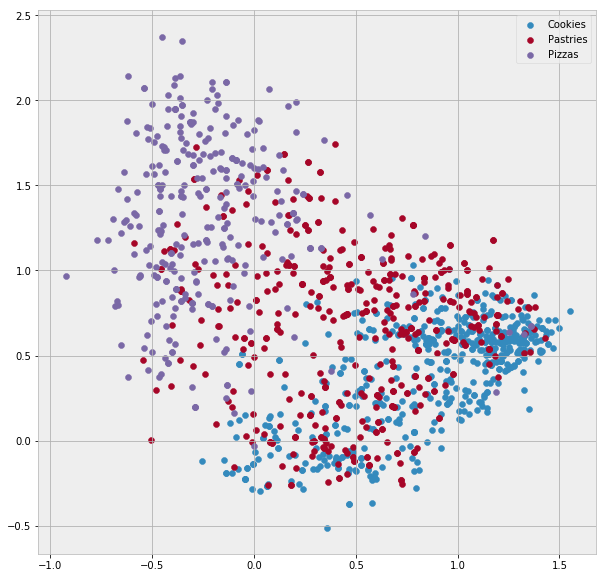

In [54]:
fig, ax = plt.subplots(figsize=(10, 10))

for label, class_name in zip(y_labels, le.classes_):
    z0 = z_enc[:, 0][y_train == label]
    z1 = z_enc[:, 1][y_train == label]
    ax.scatter(z0, z1, label=class_name)
ax.legend()

In [21]:
y_labels

array([0, 1, 2])